![](../images/logos.jpg "MiCMOR, KIT Campus Alpin")

**[MiCMOR](https://micmor.kit.edu) [SummerSchool "Environmental Data Science: From Data Exploration to Deep Learning"](https://micmor.kit.edu/sites/default/files/MICMoR%20Summer%20School%202019%20Flyer.pdf)**  
IMK-IFU KIT Campus Alpin, Sept. 4 - 13 2019, Garmisch-Partenkirchen, Germany.

---

# Pandas

![](https://img.etimg.com/thumb/msid-51641992,width-643,imgsize-288661,resizemode-4/kung-fu-panda-3-review-film-ticks-all-the-boxes.jpg)

In [145]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Working with tabular data

The Pandas package is for many people *the reason* for much of the recent success of python as the Data Science language.

In a  Stackoverflow [study](https://stackoverflow.blog/2017/09/14/python-growing-quickly/) it was concluded that:
>These analyses suggest two conclusions. First, the fastest-growing use of Python is for data science, machine learning and academic research. This is particularly visible in the growth of the pandas package, which is the fastest-growing Python-related tag on the site. As for which industries are using Python, we found that it is more visited in a few industries, such as electronics, manufacturing, software, government, and especially universities. However, Python’s growth is spread pretty evenly across industries. In combination this tells a story of data science and machine learning becoming more common in many types of companies, and Python becoming a common choice for that purpose.

<center>
<img width="400" src=https://1015711.v1.pressablecdn.com/wp-content/uploads/2017/09/related_tags_over_time-1-1200x1200.png>
<p><center><em>The rise of pandas</em></center></p>
</center>

So we first explore the basics of working with pandas a bit and later use it for some analysis.

### Basic data types: Seris, DataFrame

In general we import pandas like this. Usually you also want numpy for some processing so we import it too:

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

Pandas features two basic types:  **Series** and **DataFrame** ([see also the relevant section in the getting started guide](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html)). 
A series holds an one-dimensional labeled array, a dataframe is a 2-dimensional labeled data structure with columns of potentially different types (think spreadsheet).

Both are composed of data and an index (the row labels). A dataframe has columns wioth column labels.

Here is how they are defined and what they look like.

First a **Series**:

In [147]:
s = pd.Series(np.random.randint(0, 10, size=10), name='Flux1')
s

0    7
1    7
2    3
3    5
4    2
5    1
6    8
7    3
8    4
9    3
Name: Flux1, dtype: int64

If the index is ommited, the Series gets an integer index (you can set it as an argument). Usually, you also want to add a name to describe your data.

Access the values with `.values`, the index with `.index`.

In [148]:
print('Values', s.values)
print('Index', s.index)

Values [7 7 3 5 2 1 8 3 4 3]
Index RangeIndex(start=0, stop=10, step=1)


Another example where you set an index expicitly (but no name):

In [149]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a    1.673319
b    0.923670
c   -0.440648
d   -0.404971
e    1.303697
dtype: float64

Note the dtype. This is the data type. This can be `object` for any non numeric data (i.e. strings) or int, float for numeric data. There's also a special dtype (categorical) that we will have a look at later. 

Now we look at a **DataFrames**:

You'll probably more often work with `DataFrames`, as they can store multiple variables.

You can create dataframes in many ways, but most often you will read the data from file (i.e. with the read_csv() function).

One way to define a dataframe is with a dictionary of columns.

In [150]:
d = {'one': [1,2,3,4], 'two': [4.1, 3.4, 2.1, 1.3]}

pd.DataFrame(d)

,one,two
0,1,4.1
1,2,3.4
2,3,2.1
3,4,1.3


Creating the dataframe while passing a custom index:

In [151]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1,4.1
b,2,3.4
c,3,2.1
d,4,1.3


Or by passing Series elements:

In [152]:
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


Let's look at the results. Pandas matches data by the index. Thus, column one has now a missing value `NaN` in row d.

This also happens if you specify columns that do not exist in the given dictionary:

In [153]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


You can access (and set) the column and row labels like this:

In [154]:
df = pd.DataFrame(d)
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [155]:
df.columns

Index(['one', 'two'], dtype='object')

In [156]:
# setting new column names
df2 = df.copy()
df2.columns = ['V1', 'V2']
df2

,V1,V2
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


You can create new columns like this:

In [157]:
df3 = df.copy()
df3['three'] = df3['one'] * df3['two']

Note, there is also a differnt syntax to access columns that is very common. 

To access column 'two' like this:
```python
df.two
# is the same as
df['two']
```

However, the first version only works if the column names does not contain spaces, '.' or other symbols that might confuse the python language parser. Thus, do not use points in your column names.

You can also only use this syntax on the right side of an assignment (see [here](https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access)).

In [158]:
# this works
df4 = df.copy()
df4['three'] = df4.one * df4.two

In [159]:
# this does not work
df5 = df.copy()
df5.three = df5.one * df5.two
df5

/Users/fuchs-k/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


To delete a column you can either use `del` or `drop(colname, axis=1)` (axis=0 in pandas refers to rows-wise operations, axis=1 to column-wise operations):

In [160]:
del df5['one']
df5

,two
a,1.0
b,2.0
c,3.0
d,4.0


In [161]:
# drop one row
display(df4.drop('two', axis=1))

# drop multiple rows
df4.drop(['one','two'], axis=1)

,one,three
a,1.0,1.0
b,2.0,4.0
c,3.0,9.0
d,NaN,NaN


,three
a,1.0
b,4.0
c,9.0
d,NaN


## Indexing and selection

The basics of indexing are as follows:

| Operation                      |Syntax        |Result    |
|--------------------------------|--------------|----------|
| Select column                  |df[col]       |Series    |
| Select row by label            |df.loc[label] |Series    |
| Select row by integer location |df.iloc[loc]  |Series    |
| Slice rows                     |df[5:10]      |DataFrame |
| Select rows by boolean vector  |df[bool_vec]  |DataFrame |



In [162]:
# Examples

# 1) get first row (use iloc)
df.iloc[0]

one    1.0
two    1.0
Name: a, dtype: float64

In [163]:
# 2) get all rows and first col (use iloc)
df.iloc[:,0]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [164]:
# 3) select row by label
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [165]:
# 4) select column by label
df['two']

a    1.0
b    2.0
c    3.0
d    4.0
Name: two, dtype: float64

In [166]:
# 5) select rows 2 to 4
display(df.iloc[2:4])
df[2:4] # the same

,one,two
c,3.0,3.0
d,NaN,4.0


,one,two
c,3.0,3.0
d,NaN,4.0


## More advanced data selection and filtering

A nice and very useful feature is the following syntax. Selecting all rows where a certain value in a column fulfills a certain criterium.

In [167]:
# some fake data
data = {'sensor1': np.random.randn(10), 
        'sensor2': np.random.random(10),
        'experiment': ['a','a','a','b','a','b','c','c','a','b']}
df = pd.DataFrame(data)
df

,sensor1,sensor2,experiment
0,0.381725,0.188003,a
1,0.397124,0.856148,a
2,-0.535612,0.122410,a
3,-1.450325,0.082931,b
4,1.482308,0.635826,a
5,-0.871671,0.435999,b
6,0.584830,0.225483,c
7,-1.993264,0.497921,c
8,1.823442,0.097832,a
9,0.640043,0.946638,b


In [168]:
# get all rows where sensor2 recorded values > 0.8
df[df.sensor2 > 0.5]

,sensor1,sensor2,experiment
1,0.397124,0.856148,a
4,1.482308,0.635826,a
9,0.640043,0.946638,b


In [169]:
# get all rows of group a
df[df.experiment == 'a']

,sensor1,sensor2,experiment
0,0.381725,0.188003,a
1,0.397124,0.856148,a
2,-0.535612,0.122410,a
4,1.482308,0.635826,a
8,1.823442,0.097832,a


More complex queries can be "chained", combined into one binary selection or achieved using `query`.

In [170]:
#Task: get all rows of group a and with sensor 1 between -0.5 and 0.5
    
# chained
df.loc[df.experiment == 'a'].loc[df.sensor1 > -0.5].loc[df.sensor1 < 0.5]

,sensor1,sensor2,experiment
0,0.381725,0.188003,a
1,0.397124,0.856148,a


In [171]:
# combined (better)
df[(df.experiment == 'a') & (df.sensor1 > -0.5) & (df.sensor1 < 0.5)]

,sensor1,sensor2,experiment
0,0.381725,0.188003,a
1,0.397124,0.856148,a


In [172]:
# using query (elegant, but actually not as common since it's a bit unpythonic (more like SQL)...
df.query('experiment == "a" and sensor1 > -0.5 and sensor1 < 0.5')

,sensor1,sensor2,experiment
0,0.381725,0.188003,a
1,0.397124,0.856148,a


You can also test for elements in a list with `.isin`

In [173]:
df[df.experiment.isin(['a','c'])]
# this is actually the same as df[df.experiment != 'b'] in this case

,sensor1,sensor2,experiment
0,0.381725,0.188003,a
1,0.397124,0.856148,a
2,-0.535612,0.122410,a
4,1.482308,0.635826,a
6,0.584830,0.225483,c
7,-1.993264,0.497921,c
8,1.823442,0.097832,a


## Groupby operations

This is another super power of pandas: grouped operations.

In [174]:
# average results by experiment
df.groupby('experiment').mean()

,sensor1,sensor2
experiment,,
a,0.709797,0.380044
b,-0.560651,0.488523
c,-0.704217,0.361702


You can iterate through groups too...

In [175]:
grouped = df.groupby('experiment')
for g in grouped:
    print(g)

('a',     sensor1   sensor2 experiment
0  0.381725  0.188003          a
1  0.397124  0.856148          a
2 -0.535612  0.122410          a
4  1.482308  0.635826          a
8  1.823442  0.097832          a)
('b',     sensor1   sensor2 experiment
3 -1.450325  0.082931          b
5 -0.871671  0.435999          b
9  0.640043  0.946638          b)
('c',     sensor1   sensor2 experiment
6  0.584830  0.225483          c
7 -1.993264  0.497921          c)


There are many more possibilities, but this should give you a glimpse into the powers of pandas! For sure one reason why it became so popular in Data Science...

# Let's work with some real data now...

We take the forest fire dataset to practice our skills a bit. First check the location in the linux file system and peek at the first rows.

In [176]:
! ls -l ../data/uci/forestfire/forestfires.csv

-rw-r--r--  1 fuchs-k  IMK-IFU\Domain Users  25478 Aug 27 15:29 ../data/uci/forestfire/forestfires.csv


In [177]:
! head ../data/uci/forestfire/forestfires.csv

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0
8,6,aug,sun,92.3,85.3,488,14.7,22.2,29,5.4,0,0
8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0,0
8,6,aug,mon,91.5,145.4,608.2,10.7,8,86,2.2,0,0
8,6,sep,tue,91,129.5,692.6,7,13.1,63,5.4,0,0


So it's comma delimited, has a header row and looks pretty bog standard. No need to use any other hundreds of extra features of `read_csv()` while reading it in.

In [178]:
df = pd.read_csv('../data/uci/forestfire/forestfires.csv')

After reading the file always check the dimensions, data types of the columns and the first couple of rows to see they the reading worked as expected.

In [179]:
# The first rows of the dataframe
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [180]:
# the shape of the dataframe
df.shape

(517, 13)

In [181]:
# the data types
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

Columns 'month' and 'day' are of type object (this means 'string' or anything else pandas can not do computations with). However, they should actually be of type `categorical` as the values have to be from a defined set of values (month names, day names).

So let's convert the dtype of those columns.

In [182]:
# column month converted to categorical dtype
c1 = pd.Categorical(df.month)
c1

[mar, oct, oct, mar, mar, ..., aug, aug, aug, aug, nov]
Length: 517
Categories (12, object): [apr, aug, dec, feb, ..., may, nov, oct, sep]

In [183]:
# column month converted to categorical dtype and giving a category set and order
c2 = pd.Categorical(df.month, categories=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
c2

[mar, oct, oct, mar, mar, ..., aug, aug, aug, aug, nov]
Length: 517
Categories (12, object): [jan, feb, mar, apr, ..., sep, oct, nov, dec]

In [184]:
# assign the new column back to the dataframe
df['month'] = c2

The dataframe contains records of burned areas (column "area"). Let's quickly visualize the distribution.

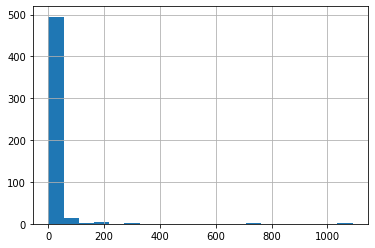

In [185]:
df.area.hist(bins=20);

Seems there are actually a lot of records without any burned area (area==0). Let's count them.

In [186]:
len(df[df.area == 0])

247

We want to find out when most forest fires occur. So let's filter the data. We can simply use `value_counts()` on the month column to find this out:

In [187]:
df.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64

However, this also includes the rows with no fires. So we filter them first. We also normlize the counts and plot it in one line. 

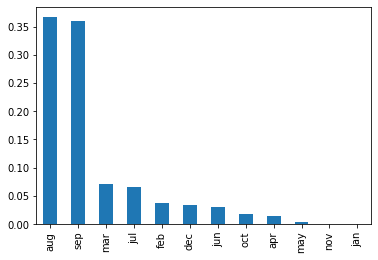

In [188]:
df[df.area > 0].month.value_counts(normalize=True).plot(kind='bar');

This actualy shows another power of pandas. It's very easy to chain operations and to directly visualize them. Pandas has some plotting directives incorporated, we will get to know more on that in the plotting lesson.

# Working with time-series data

Pandas was originally developed for business applications (like stock trading actions) and thus has very strong time-series capabilities. This is great since handling dates, times and time-series in general usually is a major pain!

We now look at some raw micromet sensor data from a permanent field measurement site of the TERENO network in Fendt near the IMK-IFU institute.

We one file per day containing records of a large range of senors in a 1-minute resolution.

In [189]:
# data
! ls -l ../data/tereno_fendt_sample/*dat | head -n 5

-rwxr-xr-x  1 fuchs-k  IMK-IFU\Domain Users  723911 Aug 27 15:29 ../data/tereno_fendt_sample/Fen_M_18_001.dat
-rwxr-xr-x  1 fuchs-k  IMK-IFU\Domain Users  723291 Aug 27 15:29 ../data/tereno_fendt_sample/Fen_M_18_002.dat
-rwxr-xr-x  1 fuchs-k  IMK-IFU\Domain Users  724284 Aug 27 15:29 ../data/tereno_fendt_sample/Fen_M_18_003.dat
-rwxr-xr-x  1 fuchs-k  IMK-IFU\Domain Users  723743 Aug 27 15:29 ../data/tereno_fendt_sample/Fen_M_18_004.dat
-rwxr-xr-x  1 fuchs-k  IMK-IFU\Domain Users  718091 Aug 27 15:29 ../data/tereno_fendt_sample/Fen_M_18_005.dat


With ! we can directly execute bash commands from python, no need to open a seperate terminal. The files are labeled with the year (18) and the doy (001, 002, ...).

In [190]:
# peek into one file to infer the file format
! head -n 2 ../data/tereno_fendt_sample/Fen_M_18_001.dat

"2018-01-01 00:00:00",13.6,-0.053,180,199,211,0.6,0.8,1,0.6,89.1,939,0,0,0,0,0,0,1.363,1.863,2.114,2.329,2.429,-79.23,1.542,1.784,2.212,2.399,2.461,2.956,1.537,1.836,2.142,2.052,2.494,"NAN",0.748,0.748,0.779,0.779,0.779,0.779,0.765,0.731,0.73,0.778,0.779,"NAN",0.75,"NAN",0.757,0.793,0.78,"NAN",-0.015,0,0.167,-4.112,-7.482,-23.77,-81,2.24,275.4,-3.371,-57.27,0.549,-27.88,-88.5,-60.64,302.3,245.1,-8.002541,-7.806843,940,-1.93,17.77,18.43,0,-11.27593,-10.07353,-9.107799,0.02866541,0.04813046,0.04811176
"2018-01-01 00:01:00",13.33,-0.053,136,150,167,0.3,0.5,0.7,0.5,88.5,939,0,0,0,0,0,0,1.343,1.872,2.183,2.319,2.43,-81,1.529,1.797,2.224,2.431,2.441,2.952,1.483,1.826,2.182,2.062,2.537,"NAN",0.748,0.748,0.778,0.779,0.779,0.779,0.765,0.731,0.73,0.777,0.779,"NAN",0.749,"NAN",0.757,0.793,0.779,"NAN",-0.012,0,0,-4.361,-8.24,-23.88,-79.06,2.246,275.4,-3.881,-55.19,0.529,-28.24,-87.3,-59.07,302.3,247.1,-7.977484,-7.806873,940,-1.972,0.987,1.81,0,-11.27593,-10.03892,-9.107799,0.02866541,0.04813046,0

As we can see there's a lot going on. There's no header labeling the columns, there's NaN values, there's a timestamp in column 1 and the file is comma delimited. 

Luckily there exists a data file description (in Excel format no less :-/). So I exportewd the column names from this description that we can find in file colnames.csv. 

In [191]:
! cat ../data/tereno_fendt_sample/colnames.csv

TIMESTAMP,BattV_Avg,PTemp_C_Avg,Wdmin_Min,Wdavg,Wdmax_Max,Wsmin_Min,Wsavg_Avg,Wsmax_Max,airtemp_Avg,relhumidity_Avg,airpressure_Avg,Ramount,Rduration_Avg,Rintensity_Avg,Hamount,Hduration_Avg,Hintensity_Avg,T107_2_West_Avg,T107_6_West_Avg,T107_12_West_Avg,T107_25_West_Avg,T107_35_West_Avg,T107_50_West_Avg,T107_2_Mitte_Avg,T107_6_Mitte_Avg,T107_12_Mitte_Avg,T107_25_Mitte_Avg,T107_35_Mitte_Avg,T107_50_Mitte_Avg,T107_2_Ost_Avg,T107_6_Ost_Avg,T107_12_Ost_Avg,T107_25_Ost_Avg,T107_35_Ost_Avg,T107_50_Ost_Avg,VWC_2_West_Avg,VWC_6_West_Avg,VWC_12_West_Avg,VWC_25_West_Avg,VWC_35_West_Avg,VWC_50_West_Avg,VWC_2_Mitte_Avg,VWC_6_Mitte_Avg,VWC_12_Mitte_Avg,VWC_25_Mitte_Avg,VWC_35_Mitte_Avg,VWC_50_Mitte_Avg,VWC_2_Ost_Avg,VWC_6_Ost_Avg,VWC_12_Ost_Avg,VWC_25_Ost_Avg,VWC_35_Ost_Avg,VWC_50_Ost_Avg,Snow_Depth,PAR_1_Avg,PAR_2_Avg,SR_Out_Avg,SR_In_Avg,IR_Out_Avg,IR_In_Avg,NR01_TC_Avg/CNR4TC_Avg,NR01_TK_Avg/CNR4TK_Avg,NetRs_Avg,NetRl_Avg,Albedo_Avg,OutTot_Avg,InTot_Avg,NetTot_Avg,IR_OutCo_Avg,IR_InCo_Avg,H_Flu

First we read the colnames and store them in a list.

In [192]:
COLNAMES = open('../data/tereno_fendt_sample/colnames.csv').readline()[:-1].split(',')
COLNAMES

['TIMESTAMP',
 'BattV_Avg',
 'PTemp_C_Avg',
 'Wdmin_Min',
 'Wdavg',
 'Wdmax_Max',
 'Wsmin_Min',
 'Wsavg_Avg',
 'Wsmax_Max',
 'airtemp_Avg',
 'relhumidity_Avg',
 'airpressure_Avg',
 'Ramount',
 'Rduration_Avg',
 'Rintensity_Avg',
 'Hamount',
 'Hduration_Avg',
 'Hintensity_Avg',
 'T107_2_West_Avg',
 'T107_6_West_Avg',
 'T107_12_West_Avg',
 'T107_25_West_Avg',
 'T107_35_West_Avg',
 'T107_50_West_Avg',
 'T107_2_Mitte_Avg',
 'T107_6_Mitte_Avg',
 'T107_12_Mitte_Avg',
 'T107_25_Mitte_Avg',
 'T107_35_Mitte_Avg',
 'T107_50_Mitte_Avg',
 'T107_2_Ost_Avg',
 'T107_6_Ost_Avg',
 'T107_12_Ost_Avg',
 'T107_25_Ost_Avg',
 'T107_35_Ost_Avg',
 'T107_50_Ost_Avg',
 'VWC_2_West_Avg',
 'VWC_6_West_Avg',
 'VWC_12_West_Avg',
 'VWC_25_West_Avg',
 'VWC_35_West_Avg',
 'VWC_50_West_Avg',
 'VWC_2_Mitte_Avg',
 'VWC_6_Mitte_Avg',
 'VWC_12_Mitte_Avg',
 'VWC_25_Mitte_Avg',
 'VWC_35_Mitte_Avg',
 'VWC_50_Mitte_Avg',
 'VWC_2_Ost_Avg',
 'VWC_6_Ost_Avg',
 'VWC_12_Ost_Avg',
 'VWC_25_Ost_Avg',
 'VWC_35_Ost_Avg',
 'VWC_50_Ost_Av

Then we read one actual data file and assign those column names. 

We also specify some rules for the import:
- there is a datetime column we want parsed into a datetime dtype called "TIMESTAMP"
- we have no header in the file (data starts in the first row)
- missing data values in the file are marked with the string "NAN"

After reading the file we set the index of the dataframe to be the timestamp column.

In [193]:
df = pd.read_csv('../data/tereno_fendt_sample/Fen_M_18_001.dat', 
                 names=COLNAMES, 
                 parse_dates=['TIMESTAMP'],
                 header=None, sep=',', na_values=['NAN'])
df = df.set_index('TIMESTAMP')

As always, we check the import and some dataframe features (shape, dtypes).

In [194]:
df.head()

,BattV_Avg,PTemp_C_Avg,Wdmin_Min,Wdavg,Wdmax_Max,Wsmin_Min,Wsavg_Avg,Wsmax_Max,airtemp_Avg,relhumidity_Avg,...,IR_TempC_Avg,Total_Avg,Diffuse_Avg,Sun,H_Flux_sc_9_Ost_Avg,H_Flux_sc_8_fernerOst_Avg,H_Flux_sc_8_Mitte_Avg,shf_cal(1),shf_cal(2),shf_cal(3)
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,13.60,-0.053,180,199,211,0.6,0.8,1.0,0.6,89.1,...,-1.930,17.770,18.430,0,-11.27593,-10.07353,-9.107799,0.028665,0.04813,0.048112
2018-01-01 00:01:00,13.33,-0.053,136,150,167,0.3,0.5,0.7,0.5,88.5,...,-1.972,0.987,1.810,0,-11.27593,-10.03892,-9.107799,0.028665,0.04813,0.048112
2018-01-01 00:02:00,13.33,-0.056,156,166,183,0.5,0.7,0.8,0.5,88.3,...,-1.902,1.645,2.797,0,NaN,NaN,NaN,0.028665,0.04813,0.048112
2018-01-01 00:03:00,13.52,-0.058,162,178,187,0.6,0.7,0.8,0.5,88.5,...,-1.874,17.930,2.139,0,NaN,NaN,NaN,0.028665,0.04813,0.048112
2018-01-01 00:04:00,13.58,-0.053,172,180,188,0.7,0.9,1.1,0.5,88.8,...,-1.741,17.440,18.590,0,NaN,NaN,NaN,0.028665,0.04813,0.048112


In [195]:
df.shape

(1440, 83)

In [196]:
df.dtypes

BattV_Avg                    float64
PTemp_C_Avg                  float64
Wdmin_Min                      int64
Wdavg                          int64
Wdmax_Max                      int64
Wsmin_Min                    float64
Wsavg_Avg                    float64
Wsmax_Max                    float64
airtemp_Avg                  float64
relhumidity_Avg              float64
airpressure_Avg                int64
Ramount                      float64
Rduration_Avg                  int64
Rintensity_Avg               float64
Hamount                        int64
Hduration_Avg                  int64
Hintensity_Avg                 int64
T107_2_West_Avg              float64
T107_6_West_Avg              float64
T107_12_West_Avg             float64
T107_25_West_Avg             float64
T107_35_West_Avg             float64
T107_50_West_Avg             float64
T107_2_Mitte_Avg             float64
T107_6_Mitte_Avg             float64
T107_12_Mitte_Avg            float64
T107_25_Mitte_Avg            float64
T

Note, since there are so many columns and rows jupyter shortens the print. If you want to have a look at all of them you need to modify the defaults:

```
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
```


Let's look at a single column:


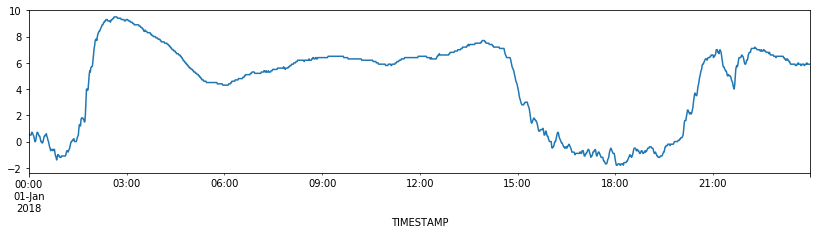

In [197]:
fig,ax = plt.subplots(1,1, figsize=(14,3))
df.airtemp_Avg.plot();

Ok, now we read in six more files and combine them into one larger file covering 1 week of data.

We use a small utility function to do this. This function does several things at once:
- it reads in one or multiple daily files
- it parses them as done before
- it set's the timestamp column as the dataframe index
- it concatenates the individual dataframes into a single on (axis-0 is vertically)
- it finally sorts the index (timestamp) ans thus the dataframe in ascending order

In [198]:
def read_tereno_daily_micromet(filename, COLNAMES):
    """read one or multiple files and return a joined dataframe"""
    if isinstance(filename, str):
        filename = [filename]
    
    fs = []
    for f in filename:
        df = pd.read_csv(f, 
                     names=COLNAMES, 
                     parse_dates=['TIMESTAMP'],
                     header=None, sep=',', na_values=['NAN'])
        df = df.set_index('TIMESTAMP')
        fs.append(df)
    return pd.concat(fs, axis=0).sort_index()

Now we read 7 daily files. We use the glob module to specify a range of files with wildcard syntax (* or [1-7]).

In [199]:
# let's read 7 days of data
import glob

# this gives us the files 001, 002, 003, ... 007
filenames = glob.glob('../data/tereno_fendt_sample/Fen_M_18_00[1-7]*.dat')
df = read_tereno_daily_micromet(filenames, COLNAMES)

In [200]:
df.shape

(10080, 83)

In [201]:
# the head of the dataframe
df.airtemp_Avg.head()

TIMESTAMP
2018-01-01 00:00:00    0.6
2018-01-01 00:01:00    0.5
2018-01-01 00:02:00    0.5
2018-01-01 00:03:00    0.5
2018-01-01 00:04:00    0.5
Name: airtemp_Avg, dtype: float64

In [202]:
# the last rows of the dataframe
df.airtemp_Avg.tail()

TIMESTAMP
2018-01-07 23:55:00    1.6
2018-01-07 23:56:00    1.6
2018-01-07 23:57:00    1.6
2018-01-07 23:58:00    1.6
2018-01-07 23:59:00    1.6
Name: airtemp_Avg, dtype: float64

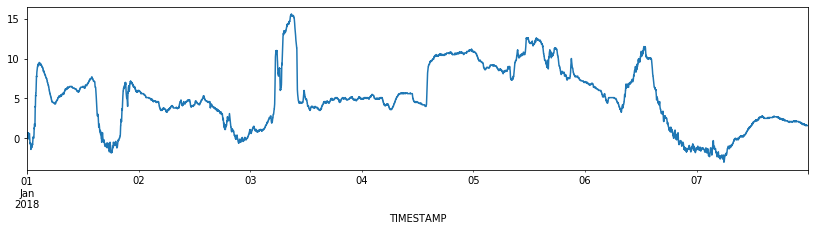

In [203]:
# plotting again
fig,ax = plt.subplots(1,1, figsize=(14,3))
df.airtemp_Avg.plot();

Notice that pandas automatically adjusts the x-axis to days (previously hours). It can do this since the index is encoded as a proper datetime dtype.

## Working with datetime encoded data

Queriung and indexing time and dates in pandas is kinda magic. See this example.

Say we want to get all data from 3:00 to 9:00 for the 2nd of January. We can index into the dataframe datetime-index column.

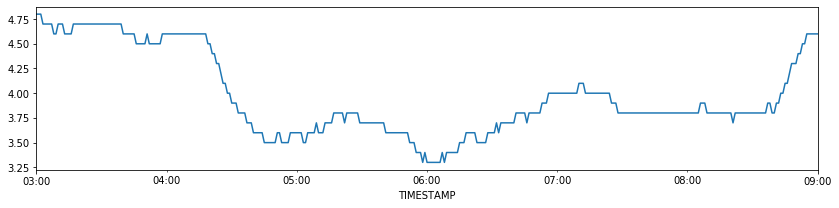

In [204]:
# select a certain period from datetime index
subset = df['2018-01-02 03:00':'2018-01-02 09:00']
fig,ax = plt.subplots(1,1, figsize=(14,3))
subset.airtemp_Avg.plot();

We can also select all rows of the day 2018-01-06 using the following syntax (it essentially rounds the datetime index down to daily values).

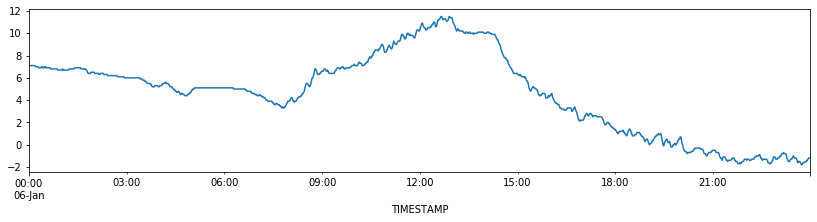

In [205]:
# select a single day from datetime index
oneday_df = df['2018-01-06']
fig,ax = plt.subplots(1,1, figsize=(14,3))
oneday_df.airtemp_Avg.plot();

Pandas comes also with resampling tools for building different temporal resolutions.

Say, we want to change our data to hourly values. We can simply do that be calling `resample()` with the appropriate time unit abbreviations (day=D, hour=H, or 15min for 15 minute intervals).

Ignore the plotting command in the next cell (we do plotting later).

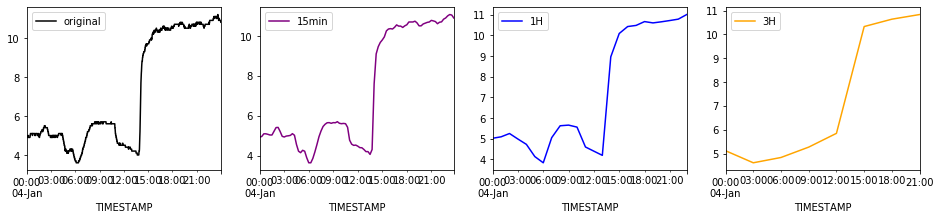

In [206]:
fig,ax = plt.subplots(1,4, figsize=(16,3))

one_day = df['2018-01-04']

one_day.airtemp_Avg.plot(ax=ax[0], label='original', color='black')
one_day.airtemp_Avg.resample('15min').mean().plot(ax=ax[1], label='15min', color='purple')
one_day.airtemp_Avg.resample('1H').mean().plot(ax=ax[2], label='1H', color='blue')
one_day.airtemp_Avg.resample('3H').mean().plot(ax=ax[3], label='3H', color='orange')

for a in ax:
    a.legend()

We can also use a  sliding window (moving average) approach to resample. This is called `rolling` in pandas and works similar to resampling.

Let's say we want to smooth with a sliding window of 30 data points (centered in the middle, this will lead to 14 NaN values at the beginning and at the end of the timesereis). The data resolution stays at 1 data point per minute.

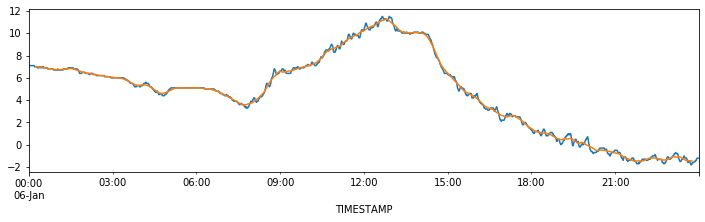

In [207]:
# rolling window/ centered with window size = 30 datapoints
fig,ax = plt.subplots(1,1, figsize=(12,3))
oneday_df.airtemp_Avg.plot(ax=ax);
oneday_df.airtemp_Avg.rolling(30, center=True).mean().plot(ax=ax);